In [47]:
import pandas as pd
from Orange.evaluation import graph_ranks
import matplotlib.pyplot as plt
from matplotlib import rc

In [3]:
table = pd.read_csv('dtd-batch/5_2_[20_40_60]')
table.head()

,MV(ACC),MV(MCC),RF(ACC),RF(MCC),wMV^vol(ACC),wMV^vol(MCC),Psi_20^vol(ACC),Psi_20^vol(MCC),Psi_40^vol(ACC),Psi_40^vol(MCC),Psi_60^vol(ACC),Psi_60^vol(MCC),wMV^inv(ACC),wMV^inv(MCC),Psi_20^inv(ACC),Psi_20^inv(MCC),Psi_40^inv(ACC),Psi_40^inv(MCC),Psi_60^inv(ACC),Psi_60^inv(MCC)
0,0.722970,0.414667,0.718597,0.400858,0.692056,0.229999,0.722970,0.414667,0.722970,0.414667,0.722970,0.414667,0.702444,0.428149,0.722970,0.414667,0.722970,0.414667,0.722970,0.414667
1,0.600494,0.169178,0.575647,0.114560,0.571050,0.093556,0.594338,0.166348,0.592238,0.129351,0.614253,0.205159,0.603687,0.166156,0.583114,0.144028,0.587645,0.142386,0.614253,0.205159
2,0.777511,0.582502,0.737924,0.463108,0.674819,0.441484,0.784178,0.594023,0.764178,0.594023,0.764178,0.594023,0.677682,0.425341,0.775845,0.581067,0.764178,0.594023,0.764178,0.594023
3,0.906900,0.814653,0.899182,0.796811,0.884991,0.771090,0.909483,0.819315,0.903726,0.808270,0.912568,0.826043,0.909370,0.825056,0.909483,0.819315,0.903726,0.808270,0.912568,0.826043
4,0.708772,0.139715,0.696815,0.078224,0.677616,0.140569,0.706484,0.140649,0.698867,0.120887,0.708772,0.139715,0.676503,0.146623,0.704310,0.136654,0.698867,0.120887,0.708772,0.139715


In [28]:
ref = ['MV', 'RF']
alg = ['Psi_20', 'Psi_40', 'Psi_60']
meth = ['^' + me for me in ['vol', 'inv']]
meas = ['(' + me + ')' for me in ['ACC', 'MCC']]
generate_rows = lambda x, y: [r + meas[x] for r in ref] + [a + meth[y] + meas[x] for a in alg]
generate_latex = lambda x, y: ['$\Psi_{' + r.lower() + '}$' for r in ref] + ['$\Psi_{' + a.split('_')[1] + '}$' for a in alg]

In [5]:
table.shape

(11, 20)

In [61]:
x, y = 1, 1
ranks = table[generate_rows(x, y)].transpose().round(3).rank(ascending = False)
mean_ranks = ranks.mean(axis = 1)
mean_ranks

MV(MCC)            2.363636
RF(MCC)            4.500000
Psi_20^inv(MCC)    2.681818
Psi_40^inv(MCC)    3.090909
Psi_60^inv(MCC)    2.363636
dtype: float64

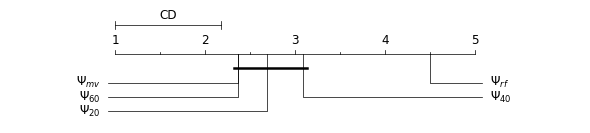

In [62]:
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica'], 'size': 12})
# rc('font',**{'family':'serif','serif':['Palatino']})
fig = graph_ranks(mean_ranks.array, generate_latex(x, y), 1.18, textspace = 1.5, width = 8, filename=(str(x) + str(y)))